# Location Processing of the Suburbs

We are given some geographical information about the suburbs within the sheets. In this notebook, we set out to locate them on the map. 

## Key Geographic Information Utilized

The main Geographic Information used to locate the suburbs is the `Location` feature, which is defined as the following:

***Location**: Description of the direction and distance (as the crow flies) from Melbourne GPO to the centroid of the community.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('ggplot')
# set the font size of the plots
plt.rcParams.update({'font.size': 10})
# Melbourne GPO coordinates

# Read in the data
data = pd.read_csv('combined_data.csv')

data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.490453,4.912570,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,8.071881,6.216803,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,10.683462,9.413847,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315


We now need to parse the `Location` entries.

In [2]:
def parse_raw_loc(x):
	temp=(x.split(' of Melbourne')[0]).split('km ')
	return (int(temp[0]),temp[1])

parse_raw_loc('28km E of Melbourne')

(28, 'E')

In [3]:
# print the max and min of the distance as the crow flies
dist_from_gpo=np.array([parse_raw_loc(x)[0] for x in data['Location']])
print('Max distance from GPO (km):',np.max(dist_from_gpo))
print('Min distance from GPO (km):',np.min(dist_from_gpo))


Max distance from GPO (km): 68
Min distance from GPO (km): 2


Define a lookup for the bearings w.r.t directions

In [4]:
# define a direction to compass bearing dictionary
direction_to_bearing = {
	'N': 0,
	'NNE': 22.5,
	'NE': 45,
	'ENE': 67.5,
	'E': 90,
	'ESE': 112.5,
	'SE': 135,
	'SSE': 157.5,
	'S': 180,
	'SSW': 202.5,
	'SW': 225,
	'WSW': 247.5,
	'W': 270,
	'WNW': 292.5,
	'NW': 315,
	'NNW': 337.5
}

In [5]:
# use the melbourne GPO as the origin, and convert polar to cartesian
# use direction and distance to get the coordinates

def get_cartesian_coords_vanilla(raw_loc):
	# get the distance and direction from the city
	dist, direction = parse_raw_loc(raw_loc)
	# get the bearing
	bearing = direction_to_bearing[direction]
	# convert to radians
	bearing_rad = np.radians(bearing)
	# convert (r, theta) polar coordinates to cartesian
	x = dist * np.sin(bearing_rad)
	y = dist * np.cos(bearing_rad) # for geographic coordinates, y=rcos(theta)
	return x, y

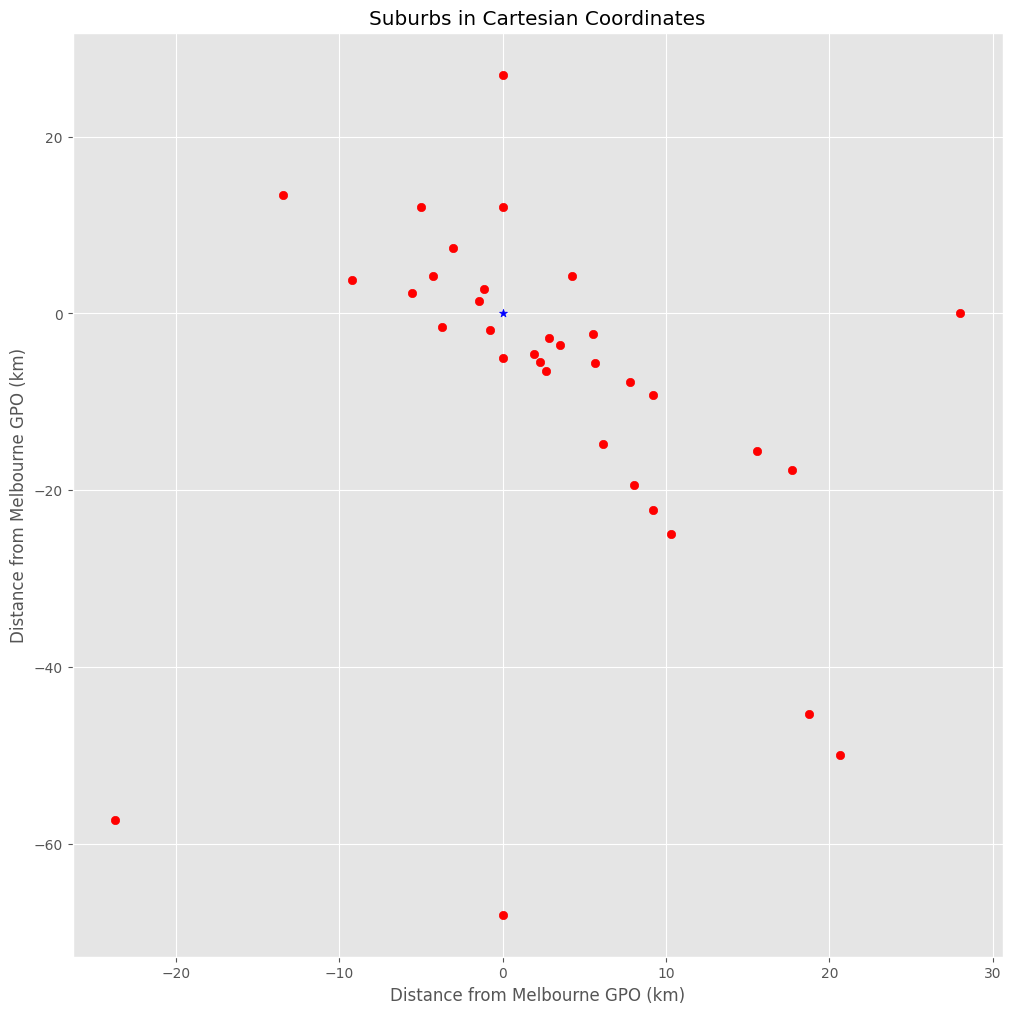

In [6]:
# plot the suburbs in cartesian coordinates
suburb_cart_coords = [get_cartesian_coords_vanilla(x) for x in data['Location']]

plt.figure(figsize=(12, 12))
plt.scatter(*zip(*suburb_cart_coords), color='red')
plt.scatter(0, 0, color='blue', marker='*')
plt.title('Suburbs in Cartesian Coordinates')
plt.xlabel('Distance from Melbourne GPO (km)')
plt.ylabel('Distance from Melbourne GPO (km)')
plt.show()

In [7]:
# append the cartesian coordinates to the dataframe
cart_x, cart_y = zip(*suburb_cart_coords)
data['cart_x'] = cart_x
data['cart_y'] = cart_y

data.to_csv('combined_data_with_loc.csv', index=False)

data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,0.000000,1.200000e+01


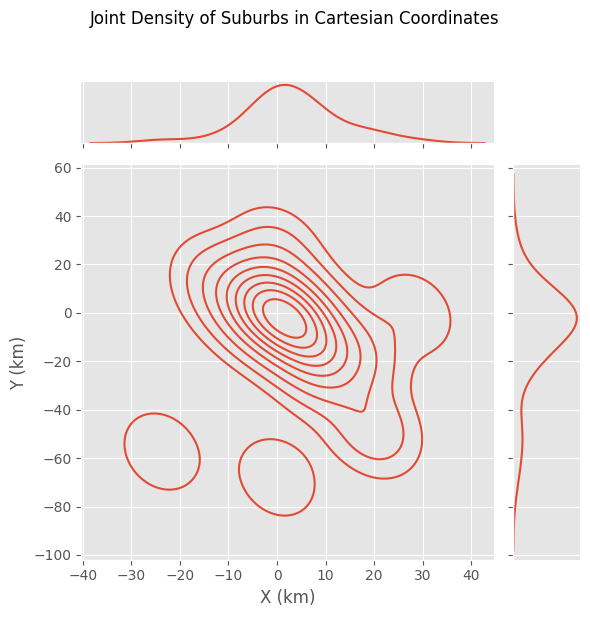

In [8]:
import seaborn as sns
# Create the joint plot
g = sns.jointplot(x='cart_x', y='cart_y', data=data, kind='kde')

# Add a title with padding
g.fig.suptitle('Joint Density of Suburbs in Cartesian Coordinates', y=1.02)

# Adjust the layout to prevent label cutoff
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust the top margin to fit the suptitle
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
# Save and display the figure
plt.savefig('../doc/figures/joint_density.png', bbox_inches='tight')

plt.show()


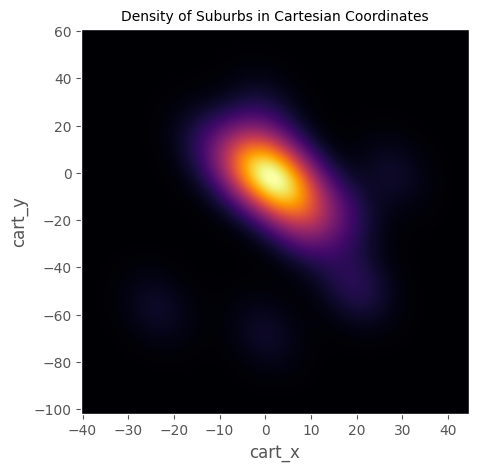

In [9]:
# Use seaborn's kdeplot for a smoother look
plt.figure(figsize=(5, 5))
sns.kdeplot(
	data=data, x='cart_x', y='cart_y', 
	cmap='inferno',  # Choose a glowing colormap
	fill=True, 
	thresh=0,  # Show even low-density areas
	levels=1000  # Increase levels for more detail
)
plt.title('Density of Suburbs in Cartesian Coordinates', fontsize=10)
plt.show()


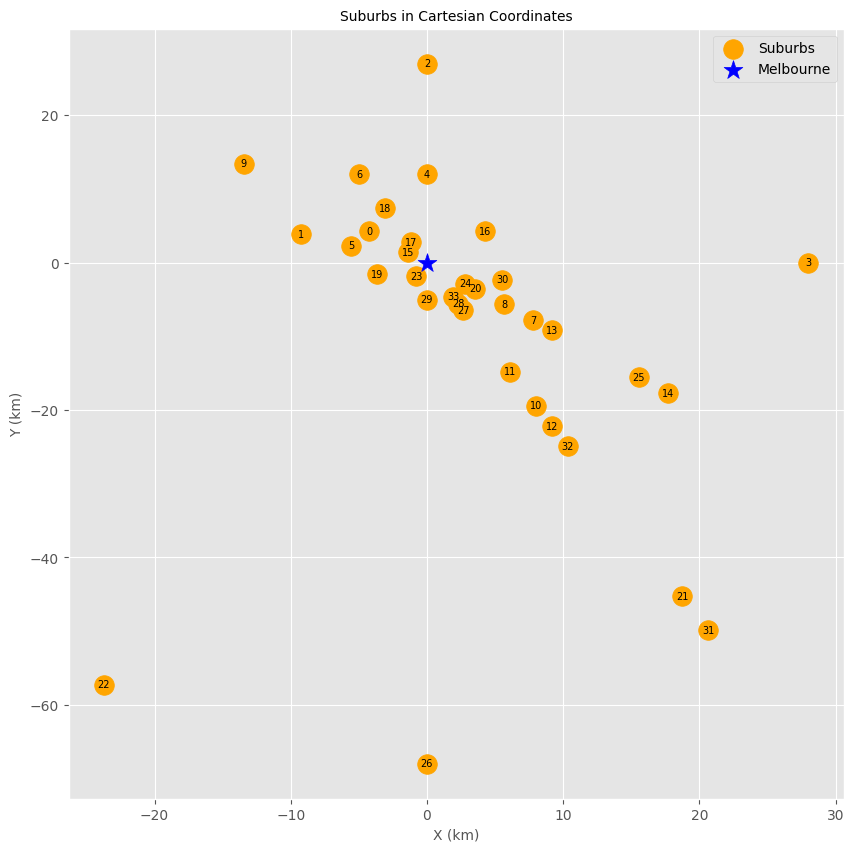

In [10]:
# plot the suburbs in cartesian coordinates
suburb_cart_coords = [get_cartesian_coords_vanilla(x) for x in data['Location']]

plt.figure(figsize=(10, 10))
plt.scatter(*zip(*suburb_cart_coords), color='orange', s=200)
plt.scatter(0, 0, color='blue', marker='*', s=200)
plt.title('Suburbs in Cartesian Coordinates', fontsize=10)
plt.xlabel('X (km)', fontsize=10)
plt.ylabel('Y (km)', fontsize=10)


# annotate the points with the suburb index
for i in range(len(suburb_cart_coords)):
	plt.annotate(i, (data.iloc[i]['cart_x'], data.iloc[i]['cart_y']), color='black', fontsize=7, ha='center', va='center')

plt.legend(['Suburbs', 'Melbourne'])
plt.savefig('../doc/figures/suburbs_cartesian.png')
plt.show()

In [11]:
suburb_names=data['Community Name']

suburb_names

0            Ascot Vale
1             Braybrook
2           Craigieburn
3               Croydon
4               Fawkner
5             Footscray
6               Glenroy
7          Malvern East
8               Malvern
9     Melbourne Airport
10              Mentone
11            Moorabbin
12           Mordialloc
13          Murrumbeena
14           Noble Park
15      North Melbourne
16            Northcote
17            Parkville
18    Pascoe Vale South
19       Port Melbourne
20              Prahran
21           Somerville
22             Sorrento
23      South Melbourne
24          South Yarra
25           Springvale
26     St Andrews Beach
27        St Kilda East
28             St Kilda
29        St Kilda West
30               Toorak
31                Tyabb
32            Waterways
33              Windsor
Name: Community Name, dtype: object

In [12]:
df=pd.DataFrame(suburb_names)

# Split the dataframe into two columns
cols = ['Index', 'Community Name']
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()

df1['Index'] = np.arange(0, 12)
df2['Index'] = np.arange(12, 24)
df3['Index'] = np.arange(24, 34)

df1['Community Name'] = df.iloc[:12].reset_index(drop=True)  # First chunk
df2['Community Name'] = df.iloc[12:24].reset_index(drop=True)  # Second chunk
df3['Community Name'] = df.iloc[24:].reset_index(drop=True)  # Third chunk


result = pd.concat([df1, df2, df3], axis=1)

result


,Index,Community Name,Index,Community Name,Index,Community Name
0,0,Ascot Vale,12,Mordialloc,24.0,South Yarra
1,1,Braybrook,13,Murrumbeena,25.0,Springvale
2,2,Craigieburn,14,Noble Park,26.0,St Andrews Beach
3,3,Croydon,15,North Melbourne,27.0,St Kilda East
4,4,Fawkner,16,Northcote,28.0,St Kilda
5,5,Footscray,17,Parkville,29.0,St Kilda West
6,6,Glenroy,18,Pascoe Vale South,30.0,Toorak
7,7,Malvern East,19,Port Melbourne,31.0,Tyabb
8,8,Malvern,20,Prahran,32.0,Waterways
9,9,Melbourne Airport,21,Somerville,33.0,Windsor


In [13]:
# print result without the default index
print(result.to_string(index=False))

 Index    Community Name  Index    Community Name  Index   Community Name
     0        Ascot Vale     12        Mordialloc   24.0      South Yarra
     1         Braybrook     13       Murrumbeena   25.0       Springvale
     2       Craigieburn     14        Noble Park   26.0 St Andrews Beach
     3           Croydon     15   North Melbourne   27.0    St Kilda East
     4           Fawkner     16         Northcote   28.0         St Kilda
     5         Footscray     17         Parkville   29.0    St Kilda West
     6           Glenroy     18 Pascoe Vale South   30.0           Toorak
     7      Malvern East     19    Port Melbourne   31.0            Tyabb
     8           Malvern     20           Prahran   32.0        Waterways
     9 Melbourne Airport     21        Somerville   33.0          Windsor
    10           Mentone     22          Sorrento    NaN              NaN
    11         Moorabbin     23   South Melbourne    NaN              NaN
